In [1]:
import pandas as pd
import numpy as np
from glob import glob

In [2]:
df_2020 = pd.read_csv('C:/Users/ching/Desktop/practice/movie/data/df_2020.csv')

In [3]:
df_2020.tail(3)

,Unnamed: 0,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,週票數變動率,銷售金額,累計銷售票數,累計銷售金額
3918,112,113,美國,記憶拼圖,2002/2/22,采昌國際多媒體股份有限公司,FREEWAY ENTERTAINMENT KFT.,14,393,-67.68,92950,9145,2181987
3919,113,114,美國,沉默的羔羊,1991/9/21,聯影企業股份有限公司,PARK CIRCUS LIMITED,1,9,-18.18,1840,7078,1698891
3920,114,115,義大利,新天堂樂園,1990/5/12,香港商甲上娛樂有限公司台灣分公司,CRISTAL DI FILM,4,97,-45.20,22655,6918,1564145


In [4]:
#今年發行之作品(不含舊片)
condition = df_2020['上映日期'].str.contains('2020')
df_2020_0 = df_2020[condition]
df_2020_0.tail(3)

,Unnamed: 0,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,週票數變動率,銷售金額,累計銷售票數,累計銷售金額
3907,101,102,美國,逃出夢幻島,2020/2/14,美商台灣索尼影業發行股份有限公司台灣分公司,SONY PICTURES RELEASING INTERNATIONAL CORPORAT...,1,83,0.00,9180,99406,21997167
3908,102,103,南韓,紅鞋公主與七矮人,2020/1/30,可樂藝術文創股份有限公司,"FINECUT CO., LTD",2,515,-8.53,26145,27906,5501812
3909,103,104,日本,巧虎電影 英雄遊樂園,2020/1/17,全民大劇團股份有限公司,法人倍樂生株式會社,13,166,-7.78,40251,21546,5108149


In [5]:
#整體描述
diff = len(df_2020['中文片名'].unique()) - len(df_2020_0['中文片名'].unique())
print('2020至8月底')
print('影片數量:'+str(len(df_2020_0['中文片名'].unique()))+f'(未列入非今年發行之作品{diff}部)')
print('影片國別地區數量:'+str(len(df_2020_0['國別地區'].unique())))
print('發行公司數量:'+str(len(df_2020_0['申請人'].unique())))

2020至8月底
影片數量:416(未列入非今年發行之作品268部)
影片國別地區數量:38
發行公司數量:71


In [6]:
#以片名goupby，避免重複計算，共有416部片
movie_list = df_2020_0['中文片名'].unique().tolist()
movie_gp = df_2020_0.groupby('中文片名')
len(movie_gp)

416

In [7]:
# 建立新dataframe，不設index，再append就好
cols = df_2020_0.columns
movie_title_df = pd.DataFrame(columns = cols)
movie_title_df

,Unnamed: 0,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,週票數變動率,銷售金額,累計銷售票數,累計銷售金額


In [9]:
# 以片名做迴圈，保留最後一列，即lastest的資料才是最新(下檔前)的累計銷售金額，並append到movie_df中
# 片名有包含相同字串，會報錯，所以要用==

for title in movie_list:
    a = df_2020_0[df_2020_0['中文片名'] == title] 
    b = a.iloc[-1,:]
    movie_title_df = movie_title_df.append(b,ignore_index=True)

In [10]:
print(movie_title_df.shape)
movie_title_df.tail()

(416, 13)


,Unnamed: 0,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,週票數變動率,銷售金額,累計銷售票數,累計銷售金額
411,9,10,日本,爆裂魔神少女,2020/8/21,車庫娛樂股份有限公司,RELAY MOTION KFT.,3,24,14.29,5330,45,9755
412,10,11,中華民國,馗降：粽邪2,2020/8/20,華影國際影藝有限公司,華影國際影藝有限公司##麻吉砥加電影有限公司##滿滿額娛樂股份有限公司##聯聯看娛樂文化股份...,1,250,-24.24,47500,580,120100
413,11,12,美國,棕櫚泉不思議,2020/8/19,車庫娛樂股份有限公司,RELAY MOTION KFT.,55,"5,715",-37.66,1368995,16831,4023767
414,12,13,日本,東京教父:4K數位修復版,2020/8/19,光年映畫有限公司,TOHOKUSHINSHA FILM CORPORATION,35,"5,244",-23.83,1239182,12129,2853581
415,13,14,日本,追逐繁星的孩子,2020/8/19,中藝國際影視股份有限公司,CoMix Wave Films Inc.,11,557,-44.47,132901,1560,379171


In [11]:
#存成csv
Result ='C:/Users/ching/Desktop/practice/movie/data/df_only2020_bytitle.csv'
movie_title_df.to_csv(Result, index=True )
print( '成功產出'+ Result)

成功產出C:/Users/ching/Desktop/practice/movie/data/df_only2020_bytitle.csv


以tableau視覺化
https://public.tableau.com/profile/ching6735#!/vizhome/_2020_16000758536640/_2020?publish=yes
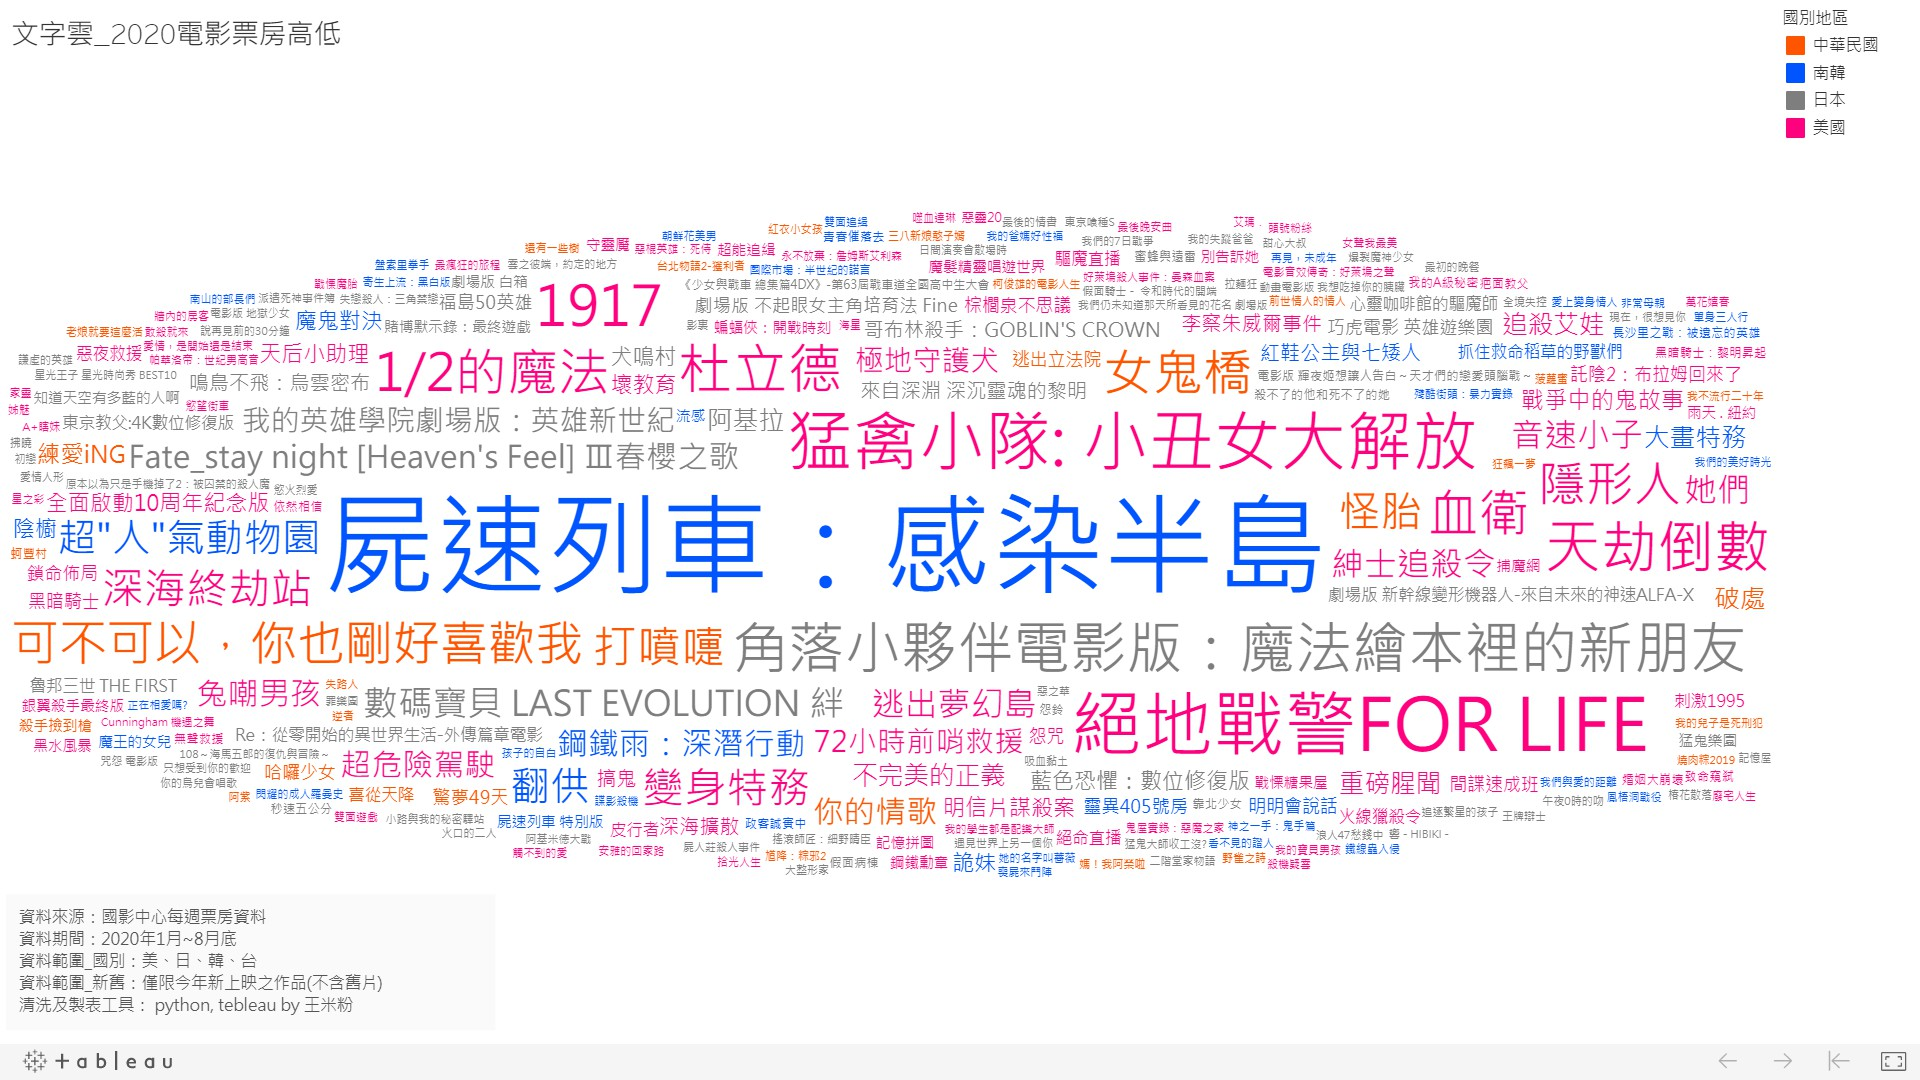